# <center> CatBoost快速入门实践

- CatBoost算法简介

&emsp;&emsp;CatBoost，全称Categorical Boosting，是由俄罗斯搜索引擎公司Yandex开发的一种高效的梯度提升决策树（Gradient Boosting Decision Trees, GBDT）算法。CatBoost于2018年由Liudmila Prokhorenkova, Gleb Gusev, Aleksandr Vorobev, Anna Veronika Dorogush和Andrey Gulin通过论文形式正式发布，一经推出便引起了机器学习领域的广泛关注。CatBoost因其在处理类别特征（categorical features）方面的卓越表现，以及其高效、准确的特性，迅速成为集成学习算法中的一颗新星。        
&emsp;&emsp;与传统GBDT算法相比，CatBoost在模型训练层面进行了多项创新优化。特别是在处理类别特征时，CatBoost引入了基于排序的目标编码（order-based target encoding）方法，避免了常见的类别特征高维问题和过拟合风险。此外，CatBoost使用了对称树（Symmetric Trees）结构，使得模型训练和预测更加高效，同时降低了内存消耗。          
&emsp;&emsp;CatBoost还具有处理数据偏序问题的独特能力，能够在训练数据中有效防止目标泄漏（target leakage），这在许多实际应用场景中是一个重要的优势。此外，CatBoost内置了多种损失函数，支持回归、分类和排序任务，并提供了丰富的特征重要性评估方法，便于用户进行特征解释和筛选。         
&emsp;&emsp;从实践层面来看，CatBoost不仅在处理类别特征的数据集上表现优异，而且在许多其他场景下也表现出色。CatBoost支持分布式计算和GPU加速，能够高效处理大规模数据。        
&emsp;&emsp;总的来说，CatBoost是一种功能多样且预测精度位于第一梯队的集成学习算法，凭借其创新的类别特征处理方法和高效的计算性能，成为机器学习实践中不可或缺的重要工具。CatBoost的推出不仅丰富了GBDT算法的家族，也为处理复杂的数据提供了强大的支持。

- CatBoost相关参考资料

&emsp;&emsp;CatBoost的官方项目地址：https://catboost.ai/

&emsp;&emsp;CatBoost的GitHub地址：https://github.com/catboost

### 1.CatBoost快速调用流程

- 安装CatBoost

In [1]:
!pip install catboost

^C
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 186.2 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.6 kB 186.2 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.6 kB 201.8 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 248.0 kB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ------ ------------------------------ 30.7/165.5 kB 435.7 kB/s eta 0:00:01
     --------- --------------------------- 41.0/165.5 kB 326.8 kB/s eta 0:00:01
     -------------

In [1]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# 数据准备
from sklearn.datasets import load_iris

- 数据准备

In [5]:
# 读取数据
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [6]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
data.shape

(150, 5)

In [8]:
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(data.drop("target", axis=1), data["target"], test_size=0.2)

In [9]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
111,6.4,2.7,5.3,1.9
0,5.1,3.5,1.4,0.2
63,6.1,2.9,4.7,1.4
37,4.9,3.6,1.4,0.1
64,5.6,2.9,3.6,1.3


In [10]:
y_train

111    2.0
0      0.0
63     1.0
37     0.0
64     1.0
      ... 
107    2.0
2      0.0
55     1.0
28     0.0
74     1.0
Name: target, Length: 120, dtype: float64

- 基础建模流程

&emsp;&emsp;需要注意的是，CatBoost并没有区分sklearn API和原生API，CatBoost调用过程中核心使用的就是CatBoostClassifier API（分类问题）和CatBoostRegressor API（回归问题），这两个主模型API既可以和sklearn API无缝集成，同时也支持一些特定的功能，如GPU加速、以及可以使用自定义数据封装工具pool API进行数据压缩和推理加速等。

In [11]:
CatBoostClassifier?

Init signature:
CatBoostClassifier(
    iterations=None,
    learning_rate=None,
    depth=None,
    l2_leaf_reg=None,
    model_size_reg=None,
    rsm=None,
    loss_function=None,
    border_count=None,
    feature_border_type=None,
    per_float_feature_quantization=None,
    input_borders=None,
    output_borders=None,
    fold_permutation_block=None,
    od_pval=None,
    od_wait=None,
    od_type=None,
    nan_mode=None,
    counter_calc_method=None,
    leaf_estimation_iterations=None,
    leaf_estimation_method=None,
    thread_count=None,
    random_seed=None,
    use_best_model=None,
    best_model_min_trees=None,
    verbose=None,
    silent=None,
    logging_level=None,
    metric_period=None,
    ctr_leaf_count_limit=None,
    store_all_simple_ctr=None,
    max_ctr_complexity=None,
    has_time=None,
    allow_const_label=None,
    target_border=None,
    classes_count=None,
    class_weights=None,
    auto_class_weights=None,
    class_names=None,
    one_hot_max_size=Non

In [12]:
clf = CatBoostClassifier()

In [13]:
clf.fit(X_train, y_train)

Learning rate set to 0.071017
0:	learn: 1.0095845	total: 144ms	remaining: 2m 24s
1:	learn: 0.9398993	total: 147ms	remaining: 1m 13s
2:	learn: 0.8789115	total: 148ms	remaining: 49.2s
3:	learn: 0.8247261	total: 149ms	remaining: 37s
4:	learn: 0.7710153	total: 149ms	remaining: 29.7s
5:	learn: 0.7170952	total: 150ms	remaining: 24.9s
6:	learn: 0.6752688	total: 151ms	remaining: 21.4s
7:	learn: 0.6376505	total: 152ms	remaining: 18.8s
8:	learn: 0.5996583	total: 152ms	remaining: 16.8s
9:	learn: 0.5672508	total: 153ms	remaining: 15.2s
10:	learn: 0.5355499	total: 154ms	remaining: 13.8s
11:	learn: 0.5091806	total: 154ms	remaining: 12.7s
12:	learn: 0.4847766	total: 155ms	remaining: 11.8s
13:	learn: 0.4652098	total: 155ms	remaining: 10.9s
14:	learn: 0.4393956	total: 156ms	remaining: 10.2s
15:	learn: 0.4202517	total: 156ms	remaining: 9.62s
16:	learn: 0.4022481	total: 157ms	remaining: 9.07s
17:	learn: 0.3829210	total: 157ms	remaining: 8.58s
18:	learn: 0.3661646	total: 158ms	remaining: 8.15s
19:	learn: 

In [14]:
clf.predict(X_test)

array([[2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [2.],
       [0.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.]])

In [15]:
clf.predict_proba(X_test)

array([[7.43058335e-04, 8.97564989e-04, 9.98359377e-01],
       [7.27759953e-01, 2.54687111e-01, 1.75529357e-02],
       [2.90154391e-03, 9.95076436e-01, 2.02201983e-03],
       [9.99183486e-01, 5.52244033e-04, 2.64270327e-04],
       [9.99188468e-01, 5.54339920e-04, 2.57192076e-04],
       [1.18726538e-03, 1.41866301e-03, 9.97394072e-01],
       [5.15146521e-03, 5.84474800e-03, 9.89003787e-01],
       [4.67905646e-04, 5.49632327e-04, 9.98982462e-01],
       [9.99326639e-01, 4.46337754e-04, 2.27022939e-04],
       [1.10614547e-03, 9.97455876e-01, 1.43797856e-03],
       [1.02094547e-02, 1.81115353e-02, 9.71679010e-01],
       [9.79581952e-04, 9.98309329e-01, 7.11088560e-04],
       [5.72205353e-04, 9.98913180e-01, 5.14614776e-04],
       [9.96157361e-01, 3.02343406e-03, 8.19204761e-04],
       [7.73789391e-04, 9.98719352e-01, 5.06858364e-04],
       [9.99049206e-01, 6.35877219e-04, 3.14916965e-04],
       [9.99110702e-01, 6.07616478e-04, 2.81681618e-04],
       [9.99256235e-01, 4.95117

In [16]:
accuracy_score(y_test, clf.predict(X_test))

0.9333333333333333

In [17]:
accuracy_score(y_train, clf.predict(X_train))

1.0

### 2.CatBoost模型API与模型基本原理

In [19]:
CatBoostClassifier?

Init signature:
CatBoostClassifier(
    iterations=None,
    learning_rate=None,
    depth=None,
    l2_leaf_reg=None,
    model_size_reg=None,
    rsm=None,
    loss_function=None,
    border_count=None,
    feature_border_type=None,
    per_float_feature_quantization=None,
    input_borders=None,
    output_borders=None,
    fold_permutation_block=None,
    od_pval=None,
    od_wait=None,
    od_type=None,
    nan_mode=None,
    counter_calc_method=None,
    leaf_estimation_iterations=None,
    leaf_estimation_method=None,
    thread_count=None,
    random_seed=None,
    use_best_model=None,
    best_model_min_trees=None,
    verbose=None,
    silent=None,
    logging_level=None,
    metric_period=None,
    ctr_leaf_count_limit=None,
    store_all_simple_ctr=None,
    max_ctr_complexity=None,
    has_time=None,
    allow_const_label=None,
    target_border=None,
    classes_count=None,
    class_weights=None,
    auto_class_weights=None,
    class_names=None,
    one_hot_max_size=Non

| Name                   | Description                                                      |
|:----------------------:|:----------------------------------------------------------------:|
| iterations             | 树的数量，即训练的迭代次数，默认为 1000                         |
| learning_rate          | 学习率，决定每次迭代的步长                        |
| depth                  | 树的最大深度，控制树的复杂度，默认为 6                          |
| l2_leaf_reg            | L2 正则化系数，用于叶子节点权重的正则化，防止过拟合，默认为 3    |
| border_count           | 分箱的边界数，影响数值特征的离散化效果，默认为 254              |
| random_seed            | 随机种子，确保结果的可复现性，默认为 None                       |
| verbose                | 控制训练过程的输出频率，默认为 False，设置为 True 可以查看训练进度|
| early_stopping_rounds  | 提前停止的轮数，如果在指定轮数内没有提升，训练将停止，默认为 None|
| eval_metric            | 评估指标，用于评估模型性能，默认为 'Logloss'                   |
| cat_features           | 类别特征的列索引，用于指定哪些特征是类别特征，默认为 None        |
| use_best_model         | 如果设置为 True，将使用验证集上性能最好的模型，默认为 False      |
| grow_policy            | 决定树的生长策略，可以是 'SymmetricTree' 或 'Depthwise' 或 'Lossguide'，默认为 'SymmetricTree' |
| task_type              | 任务类型，可以是 'CPU' 或 'GPU'，指定训练时使用的硬件，默认为 'CPU'|
| bootstrap_type         | Bootstrap 的类型，可以是 'Bayesian', 'Bernoulli', 'MVS'，默认为 'Bayesian'|
| subsample              | 子样本比例，用于每次迭代时使用的数据比例，默认值为 0.66          |
| bagging_temperature    | 控制Bagging的温度参数，值越大多样性越大，默认为 1                |
| class_weights          | 类别权重，用于不平衡分类问题，默认为 None                        |
| one_hot_max_size       | 当类别特征的类别数小于或等于该值时，使用one-hot编码，默认为 2     |
| nan_mode               | NaN值处理方式，可以是 'Min', 'Max', 'Forbidden'，默认为 'Min'    |
| leaf_estimation_method | 叶子节点权重估计方法，可以是 'Newton' 或 'Gradient'，默认为 'Newton'|
| max_bin                | 最大的分箱数，影响直方图的数量，默认为 254                       |
| score_function         | 树节点分裂评分函数，可以是 'Cosine', 'L2', 'NewtonCosine', 'NewtonL2'，默认为 'Cosine'|
| leaf_estimation_iterations | 叶子节点估计的迭代次数，默认为 1                           |
| min_data_in_leaf       | 每个叶子节点最少的数据量，防止过拟合，默认为 1                  |
| feature_border_type    | 特征分箱类型，可以是 'Median', 'Uniform', 'UniformAndQuantiles', 'MaxLogSum'，默认为 'GreedyLogSum'|
| sampling_frequency     | 采样频率，可以是 'PerTree' 或 'PerTreeLevel'，默认为 'PerTree'   |
| rsm                    | 随机特征子空间的比例，默认为 1                                  |
| od_pval                | 提前停止的p-value，默认为 0                                     |
| od_wait                | 提前停止的等待轮数，默认为 20                                   |
| metric_period          | 指标输出的间隔，默认为 1                                       |
| boost_from_average     | 是否从平均值提升，默认为 True                                   |
| model_shrink_rate      | 模型收缩率，用于控制模型的复杂度，默认为 0                      |
| model_shrink_mode      | 模型收缩模式，可以是 'Constant', 'Decreasing'，默认为 'Constant'|

#### 2.1 离散特征编码方法：Order-based Target Encoding

&emsp;&emsp;Order-based Target Encoding是CatBoost处理类别特征的一种独特方法，它在保持数据泄漏风险最小化的同时，有效地利用了类别特征的信息。这种方法通过有序的目标编码来处理类别特征，具体实现如下。

&emsp;&emsp;在目标编码中，我们使用类别特征的目标变量统计信息（如均值）来代替类别特征的值。Order-based Target Encoding是一种目标编码的变种，它通过对数据进行排序，并在计算过程中引入伪随机数以避免目标泄漏。

- Order-based Target Encoding执行流程

1) **排序数据**：将数据按照某种顺序排列（如样本索引的顺序或时间戳顺序）。
2) **递增计算均值**：对于每一个类别，按顺序递增地计算其目标变量的均值。
3) **添加噪声**：在计算均值时引入一定的噪声，以减少过拟合的风险。      

具体实现步骤:

假设我们有一个类别特征`category`和目标变量`target`，我们按照以下步骤进行Order-based Target Encoding：

1. **初始化和排序数据**：
   按照某种顺序对数据进行排序，这里我们使用样本的索引顺序。

2. **逐步计算均值**：
   按照排序后的顺序，依次计算每个类别的目标变量的均值。在计算时，当前样本不包含在均值的计算中，以避免目标泄漏。

3. **添加噪声**：
   在计算过程中引入噪声，可以使用拉普拉斯噪声或高斯噪声。这一步可以有效防止过拟合。

- 代码实现流程

In [24]:
# 创建示例数据
data = pd.DataFrame({
    'category': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    'target': [1, 0, 1, 0, 1, 0, 0, 1]
})

In [25]:
data

,category,target
0,A,1
1,B,0
2,A,1
3,B,0
4,A,1
5,B,0
6,A,0
7,B,1


In [22]:
# 排序数据
data = data.sort_index()

In [23]:
data

,category,target
0,A,1
1,B,0
2,A,1
3,B,0
4,A,1
5,B,0
6,A,0
7,B,1


In [26]:
# 初始化编码后的列
encoded_values = np.zeros(len(data))

In [27]:
encoded_values

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
# 计算逐步均值
category_sums = {}
category_counts = {}

In [29]:
for i, row in data.iterrows():
    category = row['category']
    target = row['target']
    
    if category not in category_sums:
        category_sums[category] = 0
        category_counts[category] = 0
    
    # 计算当前样本的编码值（不包括当前样本的target值）
    if category_counts[category] > 0:
        encoded_values[i] = category_sums[category] / category_counts[category]
    else:
        encoded_values[i] = 0  # 或者使用全局均值
    
    # 更新类别的累计和计数
    category_sums[category] += target
    category_counts[category] += 1

In [34]:
category_sums

{'A': 3, 'B': 1}

In [35]:
category_counts

{'A': 4, 'B': 4}

In [30]:
# 添加噪声
encoded_values += np.random.normal(0, 0.01, len(encoded_values))

In [31]:
encoded_values

array([-9.45339342e-03, -1.55141885e-04,  1.00513641e+00,  6.49084861e-03,
        1.01322003e+00, -7.68773299e-03,  9.81915963e-01, -1.16689490e-02])

In [32]:
# 将编码值添加回原数据框
data['encoded_category'] = encoded_values

In [33]:
data

,category,target,encoded_category
0,A,1,-0.009453
1,B,0,-0.000155
2,A,1,1.005136
3,B,0,0.006491
4,A,1,1.013220
5,B,0,-0.007688
6,A,0,0.981916
7,B,1,-0.011669


- Order-based Target Encodin编码优势

- **防止目标泄漏**：通过有序递增地计算均值，当前样本的目标变量不被用于其自身的编码，这有效地防止了目标泄漏。
- **减少过拟合**：通过引入噪声，目标编码变得更加稳健，可以有效减少过拟合的风险。
- **适应类别特征**：对于高基数的类别特征，这种方法尤其有效，因为它避免了one-hot编码导致的高维问题。

Order-based Target Encoding是CatBoost处理类别特征的核心技术之一，通过有序计算目标均值并引入噪声，有效地利用了类别特征的信息，同时避免了目标泄漏和过拟合。这种方法在许多实际应用中表现出色，是CatBoost在处理类别特征方面的一个显著优势。

#### 2.2 CatBoost叶节点权重估计方法

&emsp;&emsp;在GBDT和XGB的基础上，CatBoost在叶节点权重估计同时融入了GBDT和XGB的叶节点计算公式，并将其命名为`Newton` 和 `Gradient`，其中 `Gradient`梯度法就是GBDT的叶节点权重计算公式，即直接使用损失函数的梯度来更新叶节点的权重，在每次迭代中，通过计算损失函数对当前预测值的梯度，将梯度累加到叶节点的权重上，从而更新叶节点的权重，表达式为$$w_j = -\frac{\sum_{i \in R_j} g_i}{|R_j| + \lambda}$$

其中：
- $w_j$ 是叶节点 $ j $ 的权重。
- $ R_j $ 表示第 $ j $ 个叶节点中的样本集合。
- $ g_i $ 是第 $ i $ 个样本的梯度，即损失函数对当前模型输出的负梯度：

$$
g_i = -\left.\frac{\partial l(y_i, F(x_i))}{\partial F(x_i)}\right|_{F(x) = F_m(x)}
$$

- $|R_j|$ 是第 $ j $ 个叶节点中的样本数量。
- $\lambda$ 是正则化参数。

而所谓的`Newton`（牛顿法），则是采用了XGB和LGBM相同的叶节点权重计算公式，表达式为$$w_j = -\frac{\sum_{i \in R_j} g_i}{\sum_{i \in R_j} h_i + \lambda}$$

其中：
- $ w_j $ 是叶节点 $ j $ 的权重。
- $ R_j $ 表示第 $ j $ 个叶节点中的样本集合。
- $ g_i $ 是第 $ i $ 个样本的梯度：

$$
g_i = -\left.\frac{\partial l(y_i, F(x_i))}{\partial F(x_i)}\right|_{F(x) = F_m(x)}
$$

- $ h_i $ 是第 $ i $ 个样本的Hessian，即损失函数的二阶导数：

$$
h_i = \left.\frac{\partial^2 l(y_i, F(x_i))}{\partial F(x_i)^2}\right|_{F(x) = F_m(x)}
$$

- $\lambda$ 是正则化参数，用于防止过拟合。

#### 2.3 CatBoost分裂增益计算方法

&emsp;&emsp;有了叶节点的分裂增益计算方法，分裂增益的计算方法也不难推导。在CatBoost中，代表分裂增益的参数为score_function，根据官方描述，该参数可选的参数Cosine、L2、NewtonCosine和NewtonL2，而这几种不同的分裂增益计算公式如下：

$$
Gain_{Cosine} = \frac{G_L \cdot G_R}{\sqrt{H_L H_R}}
$$

$$
Gain_{L2} = \frac{G_L^2}{H_L + \lambda} + \frac{G_R^2}{H_R + \lambda} - \frac{(G_L + G_R)^2}{H_L + H_R + \lambda}
$$

$$
Gain_{NewtonCosine} = \frac{G_L \cdot G_R}{\sqrt{H_L H_R + \lambda}}
$$

$$
Gain_{NewtonL2} = \frac{G_L^2}{H_L + \lambda} + \frac{G_R^2}{H_R + \lambda} - \frac{(G_L + G_R)^2}{H_L + H_R + \lambda} - \gamma
$$

基本属于DBGT、XGB分裂增益和L2范数的排列组合。

#### 2.4 CatBoost中决策树的生长策略

&emsp;&emsp;在CatBoost中，树的生长策略决定了如何构建决策树，以最大化模型的性能。以下是三种主要的树生长策略的详细解释：

**(1) SymmetricTree**        
&emsp;&emsp;**SymmetricTree** 是CatBoost的默认树生长策略。这种策略构建对称树，即所有的节点按照相同的规则进行分裂，确保树的结构对称。这种对称性使得树的结构更加规则和可预测。SymmetricTree特点如下：
- **对称结构**：所有层的分裂点都相同，树的结构对称。
- **高效计算**：对称结构使得计算过程更高效，因为可以进行向量化运算。
- **内存利用率高**：由于结构固定，对称树的存储更加简洁，内存利用率高。      

SymmetricTree优缺点分析：
- 训练和预测速度快。
- 适合大规模数据处理。
- 实现简单，易于并行化。
- 可能不如其他方法灵活，在某些复杂数据集上表现可能稍差。

**(2) Depthwise**

**Depthwise** 策略是一种逐层生长的方法，即每次扩展树的一层，选择当前层的所有节点进行分裂，也就是XGB的生长策略。这种方法通过在每层选择最优的分裂点，逐步增加树的深度。Depthwise特点如下：
- **逐层分裂**：每一层的所有节点都参与分裂。
- **全局最优**：每次选择全局最优的分裂点，逐层构建树。        

Depthwise优缺点分析：
- 对复杂数据具有更好的表达能力。
- 能够捕捉到更复杂的模式和特征关系。
- 计算和存储成本较高。
- 训练时间可能较长，特别是在大数据集上。

**(2) Lossguide**

**Lossguide** 策略是一种基于损失函数指导的生长方法。与Depthwise方法不同，Lossguide策略每次选择对整体损失函数影响最大的节点进行分裂，而不是逐层分裂。也就是LGBM的生长策略。Lossguide特点：
- **基于损失指导**：每次选择对整体损失函数影响最大的节点进行分裂。
- **灵活性高**：能够选择更重要的节点进行优先分裂。        

Lossguide优缺点分析：
- 对复杂数据具有很强的适应性。
- 能够更有效地减少损失，提高模型性能。
- 计算复杂度高。
- 训练时间可能较长，特别是在大数据集上。

#### 2.5 CatBoost的模型收缩

&emsp;&emsp;模型收缩（Model Shrinkage）是CatBoost用于控制模型复杂度的一种技术，通过逐步减少模型中某些参数的影响，从而防止过拟合并提高模型的泛化能力。在CatBoost中，模型收缩涉及对叶节点权重的调整，通过设置`model_shrink_rate`和`model_shrink_mode`参数来实现。

- 模型收缩的基本概念      
&emsp;&emsp;模型收缩的目的是通过减少叶节点权重的幅度，使得模型更加平滑，防止模型过于复杂，避免过拟合。这一过程通过对每次迭代新增的叶节点权重进行调整，实现逐步收缩的效果。

- 模型收缩的参数

    1) `model_shrink_rate`

    - **定义**：`model_shrink_rate` 是一个控制模型收缩速率的参数。它表示每次迭代中，叶节点权重将按一定比例进行缩减。
    - **默认值**：默认为0，表示不进行收缩。
    - **作用**：通过设置非零的`model_shrink_rate`，可以使得每次新增的叶节点权重按比例缩减，从而降低模型复杂度。

    2) `model_shrink_mode`

    - **定义**：`model_shrink_mode` 是一个控制模型收缩模式的参数。
    - **可选值**：
      - `'Constant'`：以固定比例进行收缩。
      - `'Decreasing'`：按逐渐减少的比例进行收缩。
    - **默认值**：默认为 `'Constant'`。

    - 模型收缩的实现

    模型收缩通过在每次迭代中对叶节点权重进行调整来实现。假设当前迭代中计算得到的叶节点权重为 \( w \)，在应用模型收缩后，调整后的权重 \( w' \) 为：

    - Constant 模式

    在 `Constant` 模式下，叶节点权重按固定比例收缩：

    $$
    w' = w \cdot (1 - \text{shrink_rate})
    $$

    其中，`shrink_rate` 是 `model_shrink_rate` 的值。

    - Decreasing 模式

    在 `Decreasing` 模式下，叶节点权重按逐渐减少的比例收缩。具体的减少比例通常会随着迭代次数逐渐减小，常见的实现方法之一是：

    $$
    w' = w \cdot (1 - \frac{\text{shrink_rate}}{\sqrt{\text{iteration}}})
    $$

### 3.CatBoost模型API调用方法进阶

#### 3.1 回归类问题建模流程

In [2]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("train_encode.csv",index_col=0)
features = data.iloc[:, :80]
labels = data.iloc[:, 80]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [8]:
X_train.head()

,Id,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,...,半开放式门廊面积,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态
1324,1324.0,0.0,3.0,46.0,539.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,5.0
1173,1173.0,4.0,3.0,97.0,1011.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,8.0,4.0
734,734.0,0.0,3.0,0.0,406.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,3.0
417,417.0,6.0,3.0,57.0,1035.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,8.0,4.0
373,373.0,0.0,3.0,50.0,626.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,10.0,3.0,8.0,4.0


In [91]:
# 初始化CatBoost回归器
model = CatBoostRegressor(
    eval_metric='RMSE',
    verbose=0,  # 设置为0以减少打印信息
    random_seed=42
)

# 训练模型
model.fit(X_train, y_train)

In [92]:
# 预测
y_pred = model.predict(X_test)

In [93]:
y_pred

array([ 82237.15918101, 148559.39525896, 209529.97888346, 139205.52145438,
       188329.15542937, 152931.28450322, 113321.91607546, 135959.81705324,
       140403.66051848,  95845.30527924, 109017.49364114, 117345.75913575,
       169347.15813429, 246587.5584773 , 184456.13872011,  81176.95467056,
       142298.20787167, 217662.80258219,  89449.57349379, 101247.67492341,
       150494.3595731 , 143762.01423789, 120089.99323806, 121800.41328528,
       159161.57832278, 206759.51900258, 160450.83556071, 159386.57004092,
        71643.83254067, 162256.29697269, 133358.78660142, 263904.36312013,
       311449.13085792, 246257.01396081, 125357.91737753, 147531.31666656,
       219577.59772445, 194727.97988857, 148461.60726156, 152579.23430437,
       191529.36553907, 138490.22515122, 147551.82576092, 317744.14663731,
       129151.61203126, 105471.26150534, 202527.85729659, 200768.19181568,
       167345.22461446, 438211.28580308, 144862.07741795, 131722.68303724,
       206634.07301877, 2

In [47]:
# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 763760486.34


In [94]:
mse = mean_squared_error(y_train, model.predict(X_train))
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 28445653.10


- 特征重要性评估方法

In [49]:
# 获取特征重要性
feature_importances = model.get_feature_importance()
feature_names = X_train.columns

In [48]:
model.get_feature_importance?

Signature:
model.get_feature_importance(
    data=None,
    type=<EFstrType.FeatureImportance: 2>,
    prettified=False,
    thread_count=-1,
    verbose=False,
    fstr_type=None,
    shap_mode='Auto',
    model_output='Raw',
    interaction_indices=None,
    shap_calc_type='Regular',
    reference_data=None,
    sage_n_samples=128,
    sage_batch_size=512,
    sage_detect_convergence=True,
    log_cout=None,
    log_cerr=None,
)
Docstring:
Parameters
----------
data :
    Data to get feature importance.
    If type in ('LossFunctionChange', 'ShapValues', 'ShapInteractionValues') data must of Pool type.
        For every object in this dataset feature importances will be calculated.
    if type == 'SageValues' data must of Pool type.
        For every feature in this dataset importance will be calculated.
    If type == 'PredictionValuesChange', data is None or a dataset of Pool type
        Dataset specification is needed only in case if the model does not contain leaf weight informa

In [50]:
# 创建数据框
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

In [51]:
importance_df

,Feature,Importance
0,Id,0.764340
1,住宅类型,0.236225
2,住宅区域,0.947811
3,街道接触面积(英尺),0.749167
4,住宅面积,3.904038
...,...,...
75,其他配置的价值,0.002175
76,销售月份,0.449192
77,销售年份,0.320020
78,销售类型,0.218224


In [52]:
# 按重要性排序
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
17,装修质量,23.257596
46,户外活动空间面积,14.213038
38,整体地下室面积,5.088566
43,二楼面积,4.462022
34,地下室一层标准面积,4.041687
...,...,...
45,全低质量面积,0.003298
73,篱笆质量,0.002539
75,其他配置的价值,0.002175
5,街道路面状况,0.000000


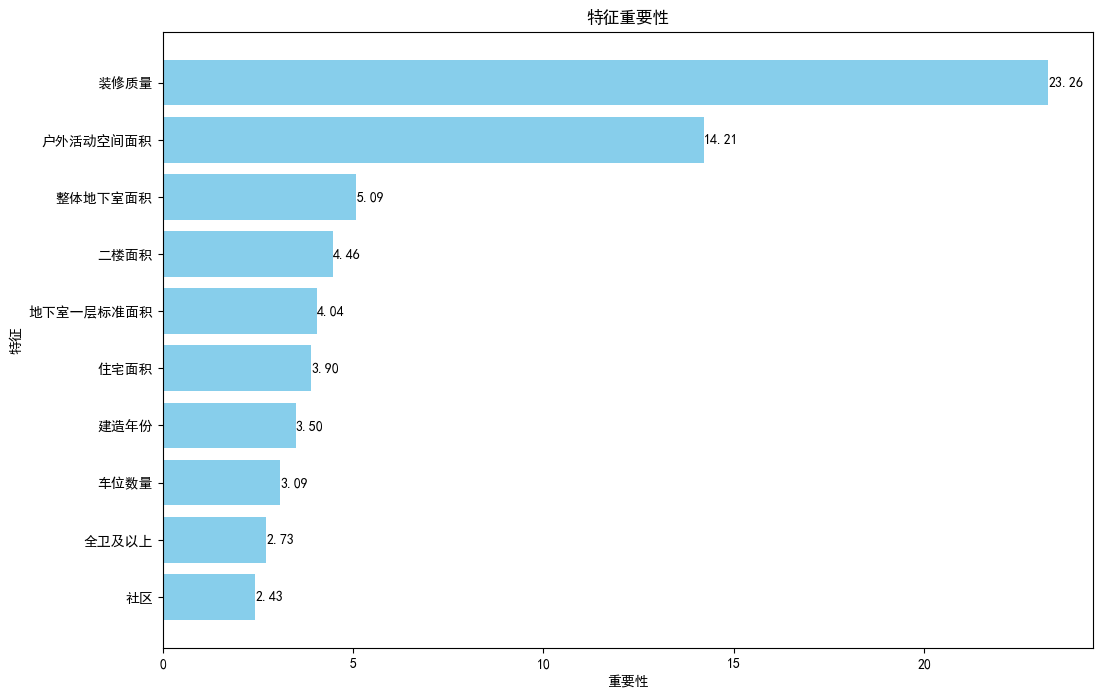

In [55]:
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

# 选择要显示的特征数
top_n = 10
if len(importance_df) > top_n:
    importance_df = importance_df.head(top_n)

# 绘制特征重要性图
plt.figure(figsize=(12, 8))  # 调整图表尺寸
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('重要性')
plt.ylabel('特征')
plt.title('特征重要性')

# 添加特征重要性数值标签
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center')

# 翻转y轴，使得特征重要性从上到下递减
plt.gca().invert_yaxis()
plt.show()

In [9]:
def importance_df_plot(feature_names, feature_importances):
    
    # 创建数据框
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })
    
    # 按重要性排序
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    # 设置中文字体
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
    plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

    # 选择要显示的特征数
    top_n = 10
    if len(importance_df) > top_n:
        importance_df = importance_df.head(top_n)

    # 绘制特征重要性图
    plt.figure(figsize=(12, 8))  # 调整图表尺寸
    bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel('重要性')
    plt.ylabel('特征')
    plt.title('特征重要性')

    # 添加特征重要性数值标签
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center')

    # 翻转y轴，使得特征重要性从上到下递减
    plt.gca().invert_yaxis()
    plt.show()

- 引入cat_features

In [10]:
cat_features = ['住宅类型',
                 '街道路面状况',
                 '巷子路面状况',
                 '住宅形状(大概)',
                 '住宅现状',
                 '水电气',
                 '住宅配置',
                 '住宅视野',
                 '社区',
                 '住宅周边1',
                 '住宅周边2',
                 '适用家庭',
                 '住宅房型',
                 '装修质量',
                 '整体质量',
                 '天花板类型',
                 '天花板材料',
                 '户外装饰1',
                 '户外装饰2',
                 '砖墙类型',
                 '户外材料质量',
                 '户外装修质量',
                 '地下室类型',
                 '地下室质量',
                 '花园外墙',
                 '地下室现状1',
                 '地下室现状2',
                 '地下室建造现状',
                 '暖气类型',
                 '暖气质量',
                 '中央空调',
                 '电力系统',
                 '全卫地下室',
                 '半卫地下室',
                 '全卫及以上',
                 '半卫及以上',
                 '卧室及以上',
                 '厨房及以上',
                 '厨房质量',
                 '总房间量',
                 '住宅性能',
                 '壁炉数量',
                 '壁炉质量',
                 '车库类型',
                 '车库装修现状',
                 '车位数量',
                 '车库质量',
                 '车库现状',
                 '石板路',
                 '其他配置',
                 '销售类型',
                 '销售状态']

In [11]:
data = pd.read_csv("train_encode.csv",index_col=0)

In [12]:
# 填补NaN值为一个特定的值（例如-1），并转换为整数类型
for cat_feature in cat_features:
    data[cat_feature] = data[cat_feature].fillna(-1).astype(int)

In [13]:
features = data.iloc[:, :80]
labels = data.iloc[:, 80]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [99]:
# 初始化CatBoost回归器
model = CatBoostRegressor(
    eval_metric='RMSE',
    verbose=0,  # 设置为0以减少打印信息
    cat_features=cat_features,
    random_seed=42
)

# 训练模型
model.fit(X_train, y_train)

In [100]:
# 预测
y_pred = model.predict(X_test)

In [101]:
y_pred

array([166710.72887333, 129840.91551513, 118542.07882138, 313615.42900323,
       161534.02564263, 247411.42137667, 212143.04256213, 105337.03907731,
       357445.9860397 , 172132.94974027, 145938.36039399, 193524.8640318 ,
       154499.90183079,  90163.35471086,  81403.46514967, 287858.74597524,
       102903.30983293, 128060.75842456, 248333.2689221 , 189254.77692464,
       189532.70622763, 159351.40379046, 194683.90326578,  92703.00729696,
       225001.63614587, 109370.20930733, 145225.93175461, 140704.29510979,
       184562.51712869, 126277.4394741 , 226177.10241221, 306198.56822232,
       151396.31485935, 220916.9445163 , 198907.27704074, 102224.87708549,
       106384.88266263, 119717.11971583, 115559.68144127, 146243.60556675,
       177541.81301433, 214098.02205658, 319035.15874236, 373256.96132496,
       228003.04121713, 194756.24915361, 231293.09240807, 117779.48597965,
       305823.58653724, 138785.46979415, 161026.19693248, 162456.16531707,
       152961.63816735, 1

In [102]:
# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 528859046.47


In [103]:
mse = mean_squared_error(y_train, model.predict(X_train))
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 150496653.97


In [86]:
# 获取特征重要性
feature_importances = model.get_feature_importance()
feature_names = X_train.columns

# 创建数据框
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 按重要性排序
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
17,装修质量,19.472962
46,户外活动空间面积,12.977020
27,户外材料质量,5.155772
38,整体地下室面积,4.702333
61,车位数量,4.633993
...,...,...
48,半卫地下室,0.001197
5,街道路面状况,0.000000
6,巷子路面状况,0.000000
75,其他配置的价值,0.000000


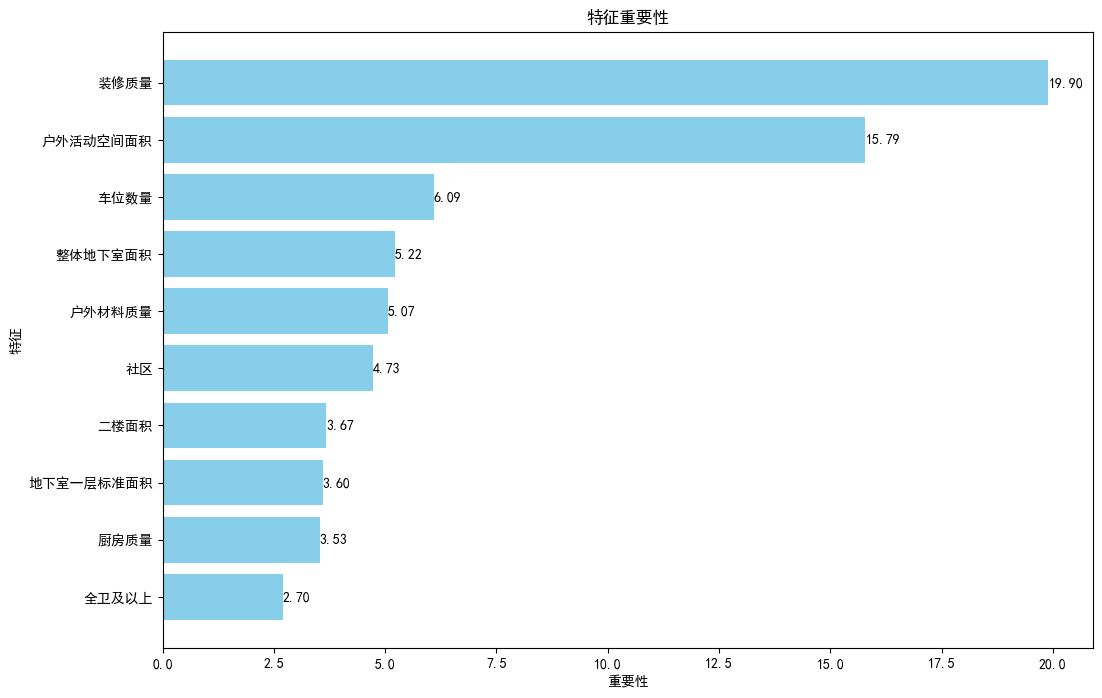

In [107]:
importance_df_plot(feature_names=X_train.columns, 
                   feature_importances=model.get_feature_importance())

#### 3.2 CatBoost超参数优化

- 网格搜索

In [3]:
from sklearn.model_selection import GridSearchCV
from matplotlib import font_manager
import time

In [10]:
# 创建超参数空间
param_grid = {
    'iterations': [200, 300, 400],
    'depth': [6, 8, 10],
}

In [120]:
# 初始化模型
model = CatBoostRegressor(cat_features=cat_features, verbose=0)

In [121]:
# 记录开始时间
start_time = time.time()

# 借助网格搜索进行超参数优化
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 记录结束时间
end_time = time.time()

# 计算并输出运行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Execution time: 236.48 seconds


In [122]:
# 输出最佳参数
print(f"Best parameters: {grid_search.best_params_}")

# 使用最佳参数训练模型
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# 预测
y_pred = best_model.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with best parameters: {mse:.2f}")

Best parameters: {'depth': 6, 'iterations': 400}
Mean Squared Error with best parameters: 544969148.99


- HyperOPT超参数优化

In [4]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

In [12]:
# 定义目标函数
def objective(params):
    model = CatBoostRegressor(
        iterations=int(params['iterations']),
        depth=int(params['depth']),
        learning_rate=params['learning_rate'],
        l2_leaf_reg=params['l2_leaf_reg'],
        border_count=int(params['border_count']),
        verbose=0         # 设置为0以减少打印信息
    )
    
    model.fit(X_train, y_train, cat_features=cat_features)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return {'loss': mse, 'status': STATUS_OK}

In [13]:
# 定义搜索空间
space = {
    'iterations': hp.quniform('iterations', 100, 1000, 50),
    'depth': hp.quniform('depth', 4, 10, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1, 10),
    'border_count': hp.quniform('border_count', 32, 128, 16)
}

In [14]:
# 进行超参数优化
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

100%|████████████████████████████████| 50/50 [19:13<00:00, 23.07s/trial, best loss: 456748780.44285]


In [15]:
# 输出最佳参数
print(f"Best parameters: {best}")

Best parameters: {'border_count': 32.0, 'depth': 5.0, 'iterations': 650.0, 'l2_leaf_reg': 2.2110072211884284, 'learning_rate': 0.05544280636236394}


In [17]:
# 使用最佳参数训练模型
best_model = CatBoostRegressor(
    iterations=int(best['iterations']),
    depth=int(best['depth']),
    learning_rate=best['learning_rate'],
    l2_leaf_reg=best['l2_leaf_reg'],
    border_count=int(best['border_count']),
    verbose=0         # 设置为0以减少打印信息
)

In [18]:
best_model.fit(X_train, y_train, cat_features=cat_features)
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with best parameters: {mse:.2f}")

Mean Squared Error with best parameters: 456748780.44


In [19]:
mse = mean_squared_error(y_train, best_model.predict(X_train))
print(f"Mean Squared Error with best parameters: {mse:.2f}")

Mean Squared Error with best parameters: 196215321.10


#### 3.3  CatBoost GPU计算模式

&emsp;&emsp;不同于LGBM的复杂的GPU计算过程，CatBoost只需要修改一个参数，即可调用GPU进行计算，即不需要安装GPU版本的CatBoost，也不需要在本地进行复杂的配置，只需要在本地安装了CUDA，就可以非常便捷的调动GPU资源进行计算。

In [125]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Fri_Sep__8_19:56:38_Pacific_Daylight_Time_2023
Cuda compilation tools, release 12.3, V12.3.52
Build cuda_12.3.r12.3/compiler.33281558_0


In [129]:
!wmic cpu get name

Name                                   

13th Gen Intel(R) Core(TM) i9-13900KF  





In [131]:
!wmic path win32_videocontroller get name

Name                     

NVIDIA GeForce RTX 4090  





---


## <center> CUDA安装流程
### 步骤1：检查系统要求

确保系统满足以下要求：
- Windows 10 或更高版本
- 支持CUDA的NVIDIA GPU（查看[NVIDIA CUDA-enabled GPU](https://developer.nvidia.com/cuda-gpus)列表）

### 步骤2：下载CUDA Toolkit

1. 打开CUDA Toolkit下载页面：[CUDA Toolkit Download](https://developer.nvidia.com/cuda-downloads)
2. 选择您的操作系统（Windows）、架构（x86_64）、版本（10）和安装类型（exe (local)）。
3. 下载CUDA安装包。

### 步骤3：安装CUDA Toolkit

1. 双击下载的安装包，启动CUDA安装程序。
2. 在安装向导中选择`Custom`（自定义）安装。
3. 确保选中所有组件，包括CUDA驱动程序、CUDA Toolkit、CUDA Samples、CUDA Developer Tools等。
4. 按照提示完成安装。

### 步骤4：配置环境变量

1. 打开控制面板，选择`系统`。
2. 点击左侧的`高级系统设置`，然后点击`环境变量`。
3. 在系统变量中，找到`Path`变量并点击`编辑`。
4. 添加以下路径到`Path`变量：
   - `C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\vXX.X\bin`（将`vXX.X`替换为实际的CUDA版本号）
   - `C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\vXX.X\libnvvp`
5. 点击`确定`保存更改。

### 步骤5：验证安装

1. 打开命令提示符（Command Prompt）。
2. 输入以下命令查看CUDA版本：

```sh
nvcc --version
```

如果安装成功，您将看到CUDA的版本信息。

---

CatBoost GPU计算的优势:
1) 计算速度快：GPU在并行计算方面具有显著的优势，能够显著加速大规模数据集的训练过程。GPU的高并行性允许同时处理多个计算任务，从而提高训练速度。

2) 高效的内存管理：GPU内存管理更高效，适合处理大规模数据集。CatBoost在GPU上使用专门优化的内存管理技术，以提高计算效率和内存利用率。

3) 优化的算法实现：CatBoost在GPU上实现了一些特定的优化算法，如快速直|方图算法（Histogram-based Algorithm），这些算法在GPU上表现更优。

4) 支持多GPU：CatBoost支持在多个GPU上进行训练，从而进一步加速模型训练过程。这对于超大规模数据集和复杂模型尤为重要。

不过需要注意的是，在小样本情况下，GPU计算优势并不明显，相反，为了将数据放到显存上、并且为了开启GPU计算本身需要耗费一段时间，因此在小样本下，GPU计算速度甚至不如CPU计算速度：

- 单次模型运行测试

In [16]:
# 记录开始时间
start_time = time.time()

# 初始化CatBoost回归器
model = CatBoostRegressor(
    eval_metric='RMSE',
    verbose=0,  # 设置为0以减少打印信息
    cat_features=cat_features,
    random_seed=42
)

# 训练模型
model.fit(X_train, y_train)

# 记录结束时间
end_time = time.time()

# 计算并输出运行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Execution time: 22.86 seconds


In [14]:
# 记录开始时间
start_time = time.time()

# 初始化CatBoost回归器
model = CatBoostRegressor(
    eval_metric='RMSE',
    verbose=0,  # 设置为0以减少打印信息
    cat_features=cat_features,
    task_type='GPU',
    random_seed=42
)

# 训练模型
model.fit(X_train, y_train)

# 记录结束时间
end_time = time.time()

# 计算并输出运行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Execution time: 45.53 seconds


- 超参数搜索优化运行测试

In [18]:
# 定义目标函数
def objective(params):
    model = CatBoostRegressor(
        iterations=int(params['iterations']),
        depth=int(params['depth']),
        learning_rate=params['learning_rate'],
        l2_leaf_reg=params['l2_leaf_reg'],
        border_count=int(params['border_count']),
        task_type='GPU',  # 使用GPU进行训练
        verbose=0         # 设置为0以减少打印信息
    )
    
    model.fit(X_train, y_train, cat_features=cat_features)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return {'loss': mse, 'status': STATUS_OK}

In [19]:
# 定义搜索空间
space = {
    'iterations': hp.quniform('iterations', 100, 1000, 50),
    'depth': hp.quniform('depth', 4, 10, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1, 10),
    'border_count': hp.quniform('border_count', 32, 128, 16)
}

In [20]:
# 进行超参数优化
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

100%|██████████████████████████████| 50/50 [19:52<00:00, 23.86s/trial, best loss: 520200323.3221383]


In [22]:
# 输出最佳参数
print(f"Best parameters: {best}")

Best parameters: {'border_count': 112.0, 'depth': 4.0, 'iterations': 150.0, 'l2_leaf_reg': 1.395556683355478, 'learning_rate': 0.1558974493543353}


In [23]:
# 使用最佳参数训练模型
best_model = CatBoostRegressor(
    iterations=int(best['iterations']),
    depth=int(best['depth']),
    learning_rate=best['learning_rate'],
    l2_leaf_reg=best['l2_leaf_reg'],
    border_count=int(best['border_count']),
    task_type='GPU',  # 使用GPU进行训练
    verbose=0         # 设置为0以减少打印信息
)

In [24]:
best_model.fit(X_train, y_train, cat_features=cat_features)
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with best parameters: {mse:.2f}")

Mean Squared Error with best parameters: 520200323.32


In [25]:
mse = mean_squared_error(y_train, best_model.predict(X_train))
print(f"Mean Squared Error with best parameters: {mse:.2f}")

Mean Squared Error with best parameters: 233026744.22


能够发现，伴随着运行任务复杂度增加，GPU运行效率逐渐和CPU运行效率持平。

#### 3.4  CatBoost pool API使用方法

- CatBoost的Pool API介绍

    1) 基本功能

    &emsp;&emsp;CatBoost的`Pool`对象是一个用于封装数据的高效数据结构。它将特征数据、标签以及元数据信息（如类别特征、权重等）封装在一起，使得数据处理和模型训练更加高效和简便。`Pool`对象提供了一种结构化的方式来管理数据，特别是在处理包含大量类别特征的数据集时显得尤为重要。

    2) 使用定位

    &emsp;&emsp;`Pool`对象在CatBoost中扮演着关键角色，主要用于以下几种场景：

    (1). **高效数据传输和处理**：`Pool`对象通过将数据和元数据信息封装在一起，减少了在训练和预测过程中数据传输的开销，提高了数据处理效率。

    (2). **处理类别特征**：CatBoost对类别特征的处理有独特的优化，`Pool`对象允许用户方便地指定和管理类别特征，从而提高模型的训练速度和预测准确性。

    (3). **内存管理**：在处理大规模数据集时，`Pool`对象通过高效的内存管理和数据存储方式，减少了内存占用，提高了训练和预测的效率，特别是在使用GPU加速时。

    &emsp;&emsp;CatBoost的`Pool`对象通过高效的数据封装和管理，使得数据处理和模型训练过程更加高效、灵活。特别是在处理包含大量类别特征的数据集时，`Pool`对象显著提高了模型的训练速度和预测准确性。无论是使用原生API还是与sklearn API集成，`Pool`对象都提供了一种简便而高效的方式来管理和处理数据，使得CatBoost在大规模数据处理和机器学习任务中表现更加出色。

- Pool API使用方法

In [21]:
# 创建Pool对象
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
test_pool = Pool(data=X_test, label=y_test, cat_features=cat_features)

In [26]:
train_pool

In [27]:
type(train_pool)

catboost.core.Pool

- CPU运行过程

In [33]:
# 记录开始时间
start_time = time.time()

# 初始化CatBoost回归器
model = CatBoostRegressor(
    eval_metric='RMSE',
    verbose=0,  # 设置为0以减少打印信息
    cat_features=cat_features,
    random_seed=42
)

# 训练模型
model.fit(train_pool)

# 记录结束时间
end_time = time.time()

# 计算并输出运行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Execution time: 21.15 seconds


In [34]:
# 预测
y_pred = model.predict(test_pool)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 585121916.14


In [35]:
# 计算均方误差
mse = mean_squared_error(y_train, model.predict(train_pool))
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 182290071.91


- GPU运行过程

In [30]:
# 记录开始时间
start_time = time.time()

# 初始化CatBoost回归器
model = CatBoostRegressor(
    eval_metric='RMSE',
    verbose=0,  # 设置为0以减少打印信息
    cat_features=cat_features,
    task_type='GPU',
    random_seed=42
)

# 训练模型
model.fit(train_pool)

# 记录结束时间
end_time = time.time()

# 计算并输出运行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Execution time: 45.08 seconds


In [32]:
# 预测
y_pred = model.predict(test_pool)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 569424960.00


In [31]:
# 计算均方误差
mse = mean_squared_error(y_train, model.predict(train_pool))
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 293397802.05


#### 3.5  CatBoost cv API使用方法

&emsp;&emsp;此外，CatBoost也提供了类似于LightGBM中的`lgb.cv`方法的交叉验证功能，通过`cv`函数来实现。`cv`函数允许在指定的参数范围内执行交叉验证，以评估模型的性能，并帮助选择最佳参数设置。

In [5]:
from catboost import cv

In [29]:
cv?

Signature:
cv(
    pool=None,
    params=None,
    dtrain=None,
    iterations=None,
    num_boost_round=None,
    fold_count=None,
    nfold=None,
    inverted=False,
    partition_random_seed=0,
    seed=None,
    shuffle=True,
    logging_level=None,
    stratified=None,
    as_pandas=True,
    metric_period=None,
    verbose=None,
    verbose_eval=None,
    plot=False,
    plot_file=None,
    early_stopping_rounds=None,
    save_snapshot=None,
    snapshot_file=None,
    snapshot_interval=None,
    metric_update_interval=0.5,
    folds=None,
    type='Classical',
    return_models=False,
    log_cout=None,
    log_cerr=None,
)
Docstring:
Cross-validate the CatBoost model.

Parameters
----------
pool : catboost.Pool
    Data to cross-validate on.

params : dict
    Parameters for CatBoost.
    CatBoost has many of parameters, all have default values.
    If  None, all params still defaults.
    If  dict, overriding some (or all) params.

dtrain : catboost.Pool or tuple (X, y)
    Sy

其中cv的核心参数解释如下：

- `pool`: `Pool`对象，包含数据和标签。
- `params`: 字典，包含模型参数设置。
- `nfold`: 整数，与`fold_count`相同，是交叉验证的折数。
- `inverted`: 布尔值，是否返回每次折叠的交叉验证结果。
- `stratified`: 布尔值，是否进行分层抽样。
- `shuffle`: 布尔值，是否在交叉验证之前对数据进行随机打乱。
- `partition_random_seed`: 整数，数据分区的随机种子。
- `seed`: 整数，与`partition_random_seed`相同，是数据分区的随机种子。
- `metric_period`: 整数，评估指标计算的周期。
- `verbose`: 布尔值，是否打印详细信息。

不难发现，cv的大多数参数和lgb.cv方法都是一样的。接下来我们尝试在开启CatBoost模型的损失值记录功能情况下，对比分析普通训练模式和cv训练模式下损失值变化的情况，以此来介绍cv实际功能。

In [6]:
import ipywidgets

In [42]:
# 创建Pool对象
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
test_pool = Pool(data=X_test, label=y_test, cat_features=cat_features)

In [43]:
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    eval_metric='RMSE',
    random_seed=42,
    logging_level='Verbose'
)

In [44]:
# 训练模型并记录每轮的损失值
model.fit(train_pool, eval_set=test_pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 74010.2315589	test: 78479.7682624	best: 78479.7682624 (0)	total: 50.3ms	remaining: 50.2s
1:	learn: 69723.6950175	test: 74066.3795872	best: 74066.3795872 (1)	total: 89.4ms	remaining: 44.6s
2:	learn: 65802.3737285	test: 69860.6439379	best: 69860.6439379 (2)	total: 120ms	remaining: 39.9s
3:	learn: 61850.7654448	test: 65714.9090208	best: 65714.9090208 (3)	total: 144ms	remaining: 36s
4:	learn: 59073.4513706	test: 62901.6987557	best: 62901.6987557 (4)	total: 178ms	remaining: 35.5s
5:	learn: 56479.3950021	test: 60496.3882568	best: 60496.3882568 (5)	total: 211ms	remaining: 35s
6:	learn: 54034.2361794	test: 57659.1870380	best: 57659.1870380 (6)	total: 247ms	remaining: 35s
7:	learn: 51621.8142839	test: 55183.6306429	best: 55183.6306429 (7)	total: 280ms	remaining: 34.8s
8:	learn: 49571.7314563	test: 52964.9627763	best: 52964.9627763 (8)	total: 317ms	remaining: 34.9s
9:	learn: 47511.9839125	test: 50704.7419222	best: 50704.7419222 (9)	total: 340ms	remaining: 33.6s
10:	learn: 45417.8829698

In [45]:
# 获取训练和验证损失值
train_loss = model.get_evals_result()['learn']['RMSE']
test_loss = model.get_evals_result()['validation']['RMSE']

In [48]:
model.get_evals_result()

{'learn': {'RMSE': [74010.23155888933,
   69723.69501753076,
   65802.37372848911,
   61850.76544475831,
   59073.45137060985,
   56479.39500205372,
   54034.23617940111,
   51621.81428385535,
   49571.73145627202,
   47511.98391248348,
   45417.882969757746,
   43801.19497493221,
   42173.62522474,
   40915.28271106274,
   39570.71594347088,
   38457.513175825174,
   37520.83076184057,
   36233.6045189494,
   35075.45775478024,
   34432.17910582289,
   33626.61924444377,
   32928.24357955484,
   32226.71249214162,
   31693.421209181048,
   30870.44764055084,
   30178.251536557542,
   29424.774530906005,
   28947.842503081214,
   28608.45901888628,
   28074.33000563664,
   27686.85225654523,
   27377.656835785605,
   27019.53971583615,
   26768.020256433836,
   26427.646320531156,
   26179.775519866827,
   26086.2239455958,
   25848.294673437613,
   25368.503393573268,
   25083.476365835802,
   24761.886717597386,
   24547.563697564186,
   24402.197949536432,
   24284.08668507877,
   2

In [49]:
model.get_evals_result().keys()

dict_keys(['learn', 'validation'])

In [51]:
model.get_evals_result()['learn'].keys()

dict_keys(['RMSE'])

In [46]:
train_loss

[74010.23155888933,
 69723.69501753076,
 65802.37372848911,
 61850.76544475831,
 59073.45137060985,
 56479.39500205372,
 54034.23617940111,
 51621.81428385535,
 49571.73145627202,
 47511.98391248348,
 45417.882969757746,
 43801.19497493221,
 42173.62522474,
 40915.28271106274,
 39570.71594347088,
 38457.513175825174,
 37520.83076184057,
 36233.6045189494,
 35075.45775478024,
 34432.17910582289,
 33626.61924444377,
 32928.24357955484,
 32226.71249214162,
 31693.421209181048,
 30870.44764055084,
 30178.251536557542,
 29424.774530906005,
 28947.842503081214,
 28608.45901888628,
 28074.33000563664,
 27686.85225654523,
 27377.656835785605,
 27019.53971583615,
 26768.020256433836,
 26427.646320531156,
 26179.775519866827,
 26086.2239455958,
 25848.294673437613,
 25368.503393573268,
 25083.476365835802,
 24761.886717597386,
 24547.563697564186,
 24402.197949536432,
 24284.08668507877,
 24028.313241341908,
 23799.520269026594,
 23637.88321200776,
 23444.56960924637,
 23220.395137932865,
 23036

In [47]:
test_loss

[78479.76826237199,
 74066.3795872109,
 69860.64393793556,
 65714.9090208172,
 62901.69875568443,
 60496.388256754304,
 57659.187037968426,
 55183.63064286946,
 52964.96277634118,
 50704.741922183865,
 48505.87824242759,
 46789.95371645156,
 45200.46745033377,
 43873.44376785606,
 42524.049628347704,
 41431.240816106394,
 40422.11357840587,
 39580.61931830282,
 38417.42627324169,
 37703.15797662172,
 37051.1881458812,
 36181.789828285284,
 35330.14543428864,
 34814.64760631564,
 34138.37651601368,
 33471.051586542264,
 33090.01859173339,
 32670.62295660443,
 32420.288399088993,
 31892.98924123095,
 31623.42634077161,
 31143.754692182643,
 30826.604639898826,
 30697.76267367317,
 30467.48160700834,
 30325.348124396794,
 30326.518469332877,
 30052.29500554023,
 29665.33138751199,
 29352.86999144374,
 28981.265431738586,
 28721.189184386174,
 28579.56031347673,
 28452.756261079026,
 28191.27518731229,
 28030.8179656519,
 28005.92909502756,
 27971.062951746437,
 27785.529813802455,
 27612.

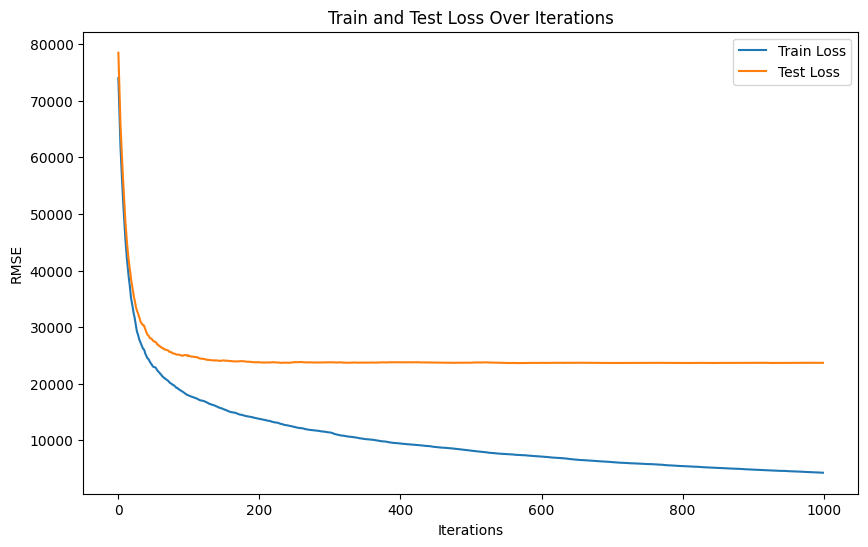

In [52]:
# 绘制损失值变化曲线
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Train and Test Loss Over Iterations')
plt.legend()
plt.show()

In [22]:
# 创建Pool对象
data_pool = Pool(data=features, label=labels, cat_features=cat_features)

In [23]:
# 定义模型参数
params = {
    'iterations': 1000,
    'learning_rate': 0.1,
    'depth': 6,
    'eval_metric': 'RMSE',
    'loss_function': 'RMSE',  # 指定损失函数
    'random_seed': 42, 
}

In [24]:
model_cv = cv(
    pool=data_pool,
    params=params,
    fold_count=5,  # 5折交叉验证
    shuffle=True,
    partition_random_seed=42,
    verbose=False
)

Training on fold [0/5]

bestTest = 24202.70129
bestIteration = 479

Training on fold [1/5]

bestTest = 24600.82622
bestIteration = 963

Training on fold [2/5]

bestTest = 22118.31394
bestIteration = 901

Training on fold [3/5]

bestTest = 29146.49148
bestIteration = 739

Training on fold [4/5]

bestTest = 26837.0384
bestIteration = 818



In [76]:
# 获取训练和验证损失值
train_loss_cv = model_cv['train-RMSE-mean']
test_loss_cv = model_cv['test-RMSE-mean']

In [77]:
model_cv

,iterations,test-RMSE-mean,test-RMSE-std,train-RMSE-mean,train-RMSE-std
0,0,179596.755759,4463.432189,179746.046612,1281.890343
1,1,163635.989091,4226.843967,163968.000900,1337.528062
2,2,149534.916828,4668.153834,149983.453460,1448.927046
3,3,137025.897056,4789.895827,137359.139467,1282.760989
4,4,125571.586645,4559.366723,125811.499099,1416.022094
...,...,...,...,...,...
995,995,25887.044173,2797.050554,3337.851239,256.168381
996,996,25887.526390,2796.783131,3334.550288,255.908226
997,997,25886.818199,2797.665577,3331.620627,256.000709
998,998,25886.229151,2797.954177,3328.059757,255.047724


In [26]:
type(model_cv)

pandas.core.frame.DataFrame

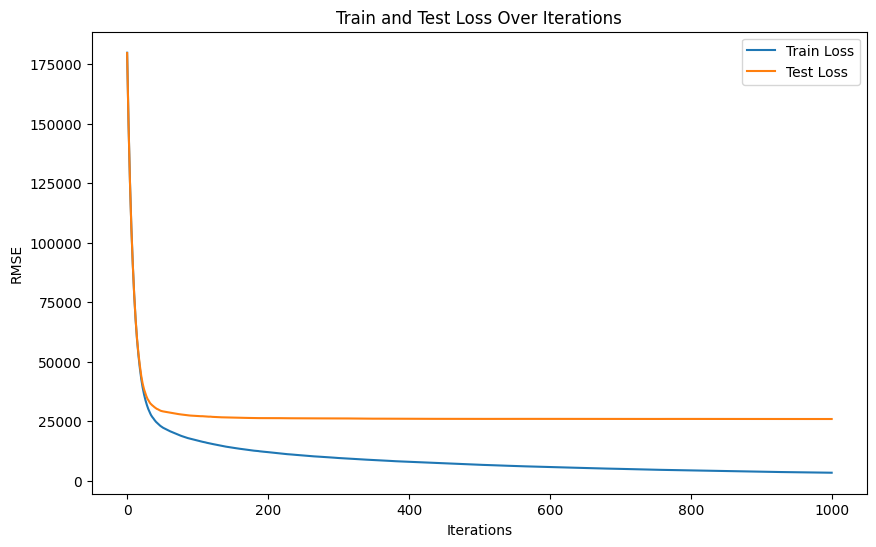

In [78]:
# 绘制损失值变化曲线
plt.figure(figsize=(10, 6))
plt.plot(train_loss_cv, label='Train Loss')
plt.plot(test_loss_cv, label='Test Loss')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Train and Test Loss Over Iterations')
plt.legend()
plt.show()

- cv+hyperopt执行高精度超参数搜索

In [14]:
# 创建Pool对象
data_pool = Pool(data=features, label=labels, cat_features=cat_features)

In [19]:
# 定义搜索空间
space = {
    'iterations': hp.quniform('iterations', 100, 1000, 50),
    'depth': hp.quniform('depth', 4, 10, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1, 10),
    'border_count': hp.quniform('border_count', 32, 128, 16),
    'loss_function': 'RMSE',
    'eval_metric': 'RMSE',
    'task_type': 'GPU',  # 使用GPU进行训练
    'random_seed': 42
}

In [20]:
# 定义目标函数
def objective(params):
    params['iterations'] = int(params['iterations'])
    params['depth'] = int(params['depth'])
    
    cv_results = cv(
        pool=data_pool,
        params=params,
        fold_count=5,  # 5折交叉验证
        shuffle=True,
        partition_random_seed=42,
        verbose=False
    )
    
    # 获取最小的测试集均方误差
    best_loss = np.min(cv_results['test-RMSE-mean'])
    
    return {'loss': best_loss, 'status': STATUS_OK}

In [15]:
# 进行超参数优化
trials = Trials()
best_params = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10, trials=trials)

Training on fold [0/5]                                                                                                 

bestTest = 28080.0459                                                                                                  

bestIteration = 294                                                                                                    

Training on fold [1/5]                                                                                                 

bestTest = 29946.92475                                                                                                 

bestIteration = 184                                                                                                    

Training on fold [2/5]                                                                                                 

bestTest = 24770.29588                                                                                                 

bestIteration = 298             

In [16]:
# 打印最佳参数
print("Best parameters:", best_params)

Best parameters: {'border_count': 112.0, 'depth': 6.0, 'iterations': 650.0, 'l2_leaf_reg': 5.254014356420343, 'learning_rate': 0.056349683368212874}


In [17]:
# 使用最佳参数重新训练模型
best_params['iterations'] = int(best_params['iterations'])
best_params['depth'] = int(best_params['depth'])

model = CatBoostRegressor(**best_params)

In [18]:
# 分割数据集用于训练和测试
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# 训练模型
model.fit(X_train, y_train, cat_features=cat_features)

# 在测试集上进行预测
y_pred = model.predict(X_test)

0:	learn: 74769.9603363	total: 37.3ms	remaining: 24.2s
1:	learn: 72226.7205215	total: 74.1ms	remaining: 24s
2:	learn: 69865.1727615	total: 116ms	remaining: 25s
3:	learn: 67825.3684385	total: 153ms	remaining: 24.7s
4:	learn: 65902.0175775	total: 187ms	remaining: 24.2s
5:	learn: 63929.8577539	total: 226ms	remaining: 24.3s
6:	learn: 62086.4159101	total: 262ms	remaining: 24.1s
7:	learn: 60238.5038161	total: 297ms	remaining: 23.8s
8:	learn: 58500.7314155	total: 332ms	remaining: 23.6s
9:	learn: 57049.2731117	total: 354ms	remaining: 22.7s
10:	learn: 55588.5436298	total: 389ms	remaining: 22.6s
11:	learn: 54018.0665128	total: 425ms	remaining: 22.6s
12:	learn: 52507.1317591	total: 470ms	remaining: 23s
13:	learn: 51107.6919245	total: 506ms	remaining: 23s
14:	learn: 49821.5849592	total: 543ms	remaining: 23s
15:	learn: 48623.4339862	total: 578ms	remaining: 22.9s
16:	learn: 47195.7035711	total: 613ms	remaining: 22.8s
17:	learn: 46188.6795423	total: 650ms	remaining: 22.8s
18:	learn: 45201.0328352	tot

In [19]:
# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on test data: {mse:.2f}')

Mean Squared Error on test data: 656260600.84
